In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
# Load the dataset
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Preview the dataset
print(data.head())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [3]:
# Data Cleaning: Drop NaN values and select relevant columns
data = data.dropna()  # Drop rows with missing values
data = data[['year', 'selling_price', 'km_driven']]  # Select relevant columns


In [4]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [5]:
# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


In [6]:
# Apply KMeans Clustering with 3 clusters
kmeans = KMeans(n_clusters=3)  # You can change the number of clusters based on analysis
kmeans.fit(pca_data)

# Add cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_


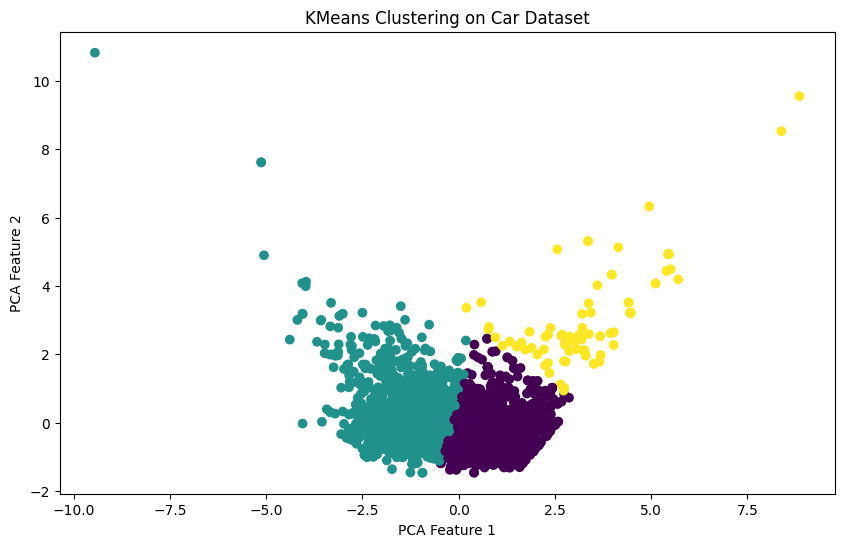

In [7]:
# 1st Visualization: KMeans Cluster Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('KMeans Clustering on Car Dataset')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


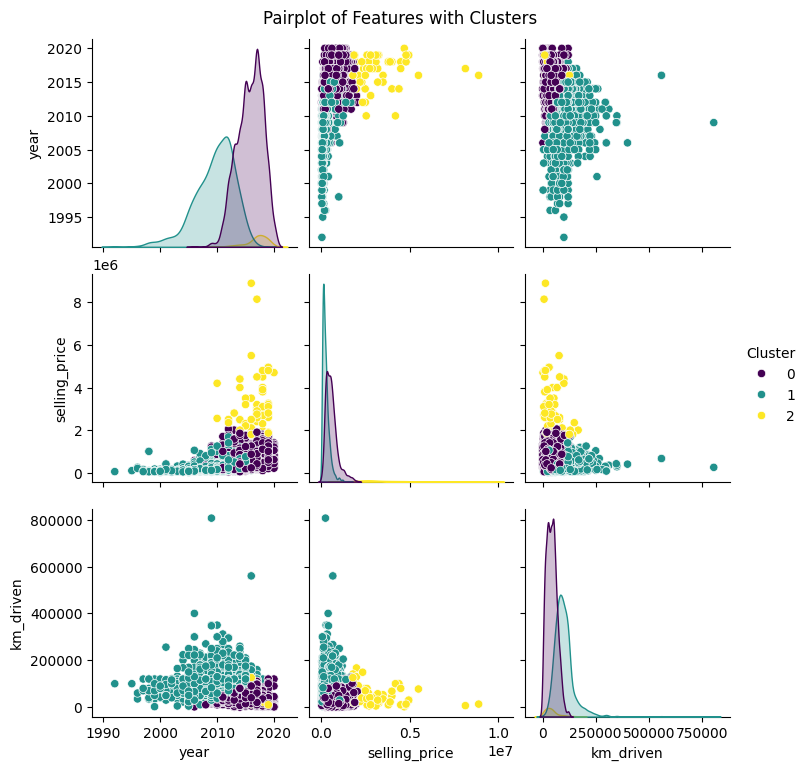

In [8]:
# 2nd Visualization: Pairplot of features colored by clusters
sns.pairplot(data, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Features with Clusters', y=1.02)
plt.show()


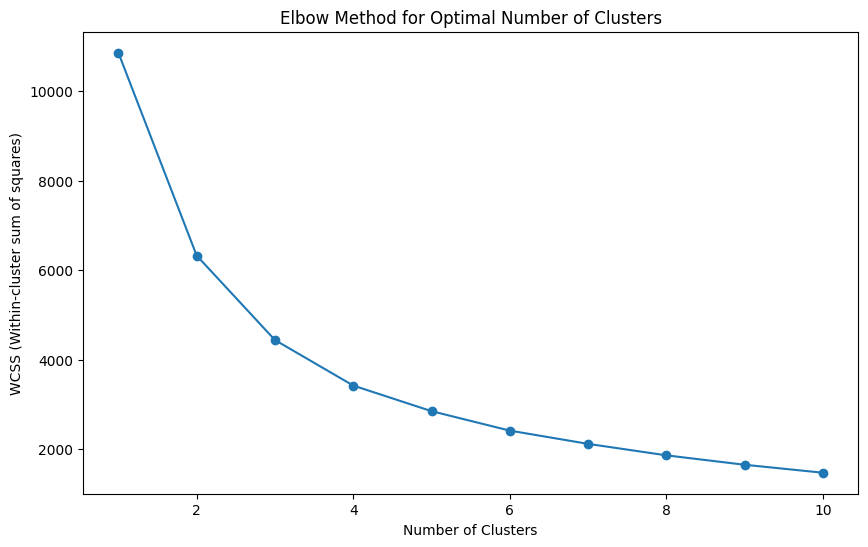

In [9]:
# 3rd Visualization: Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


In [11]:
# Summary statistics of clusters
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


                year  selling_price     km_driven
Cluster                                          
0        2015.740315   5.756556e+05  41185.360579
1        2009.576882   2.575289e+05  98732.025451
2        2016.933333   3.333314e+06  42128.209524
